In [1]:
import numpy as np
import pandas as pd

print('Hola2')

Hola2


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print('Hello2')

Hello2


In [3]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

print('Way3')

Using TensorFlow backend.


Way3


In [4]:
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
Y_train = train['label'].values.astype('int32')

In [5]:



#Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

#Do not append test to train to build the PCA model
#train.append(test)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')


print('Way4')

Way4


Y_train value form: 0
Which is 0 (1 in [0] position of the vector).


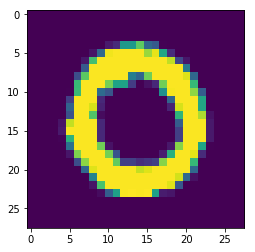

In [6]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
plt.show()

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
#X_sc_test = scaler.transform(X_test)
print('Ula')

Ula


Text(0, 0.5, 'Cumulative explained variance')

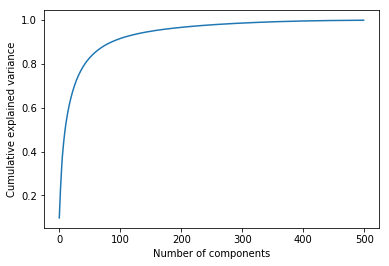

In [8]:
pca = PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [9]:
from datetime import datetime

#95% -> 170
NCOMPONENTS = 170

pca = PCA(n_components=NCOMPONENTS)
start=datetime.now()
X_pca_train = pca.fit_transform(X_sc_train)
#X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)
end=datetime.now()
print(end-start)

print(X_sc_train.shape)
print(X_pca_train.shape)

0:00:03.661762
(42000, 784)
(42000, 170)


In [10]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

In [11]:
inv_sc.shape

(42000, 784)

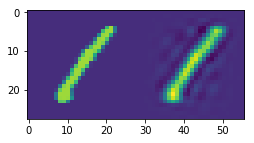

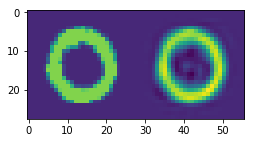

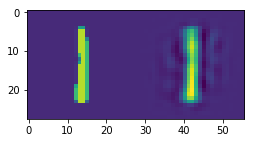

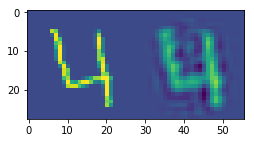

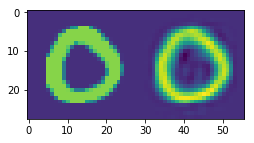

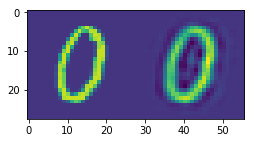

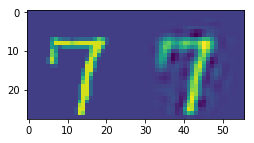

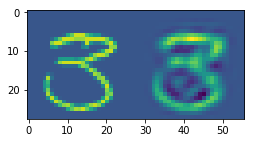

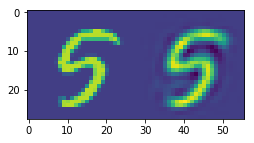

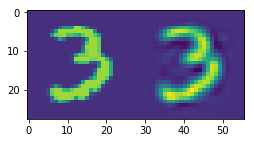

In [12]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# Train the model on training data
start=datetime.now()
rf.fit(inv_sc, Y_train);
end=datetime.now()
print(end-start)

0:00:37.575228


In [14]:
predictions_test = rf.predict(X_test)

In [15]:
predictions_test.shape

(28000,)

In [16]:
sequence = pd.Series(range(1,predictions_test.shape[0]+1))

In [17]:
dataset = pd.DataFrame({'ImageId':sequence,'label':predictions_test})

In [18]:
dataset.head(5)

,ImageId,label
0,1,2
1,2,0
2,3,4
3,4,7
4,5,2


In [19]:
export_csv = dataset.to_csv (r'rf_3_pca.csv', index = None, header=True) 